# Subset the healthy controls

In [16]:
import scanpy as sc
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 18

In [2]:
# adata = sc.read_h5ad("/data/scRNA-seq/covid19_GSE158055/covid19_GSE158055_raw.h5ad")
# is_healthy = adata.obs['characteristics: Sample time'].isin(['control'])
# is_facs_or_frozen = ~adata.obs['characteristics: Sample type'].isin(["fresh PBMC"])
# is_major_celltype = ~adata.obs['majorType'].isin(["Neu", "Macro"])
# subset_adata = adata[is_healthy & is_facs_or_frozen & is_major_celltype,].copy()
# subset_adata.write_h5ad("../datasets/covid19_GSE158055_raw_health.h5ad")
# subset_adata

In [3]:
subset_adata = sc.read_h5ad("../datasets/covid19_GSE158055_raw_health.h5ad")
print(subset_adata)
print(subset_adata.obs['sampleID'].unique())
print(subset_adata.obs['majorType'].value_counts())

AnnData object with n_obs × n_vars = 84871 × 27943
    obs: 'sampleID', 'celltype', 'majorType', 'title', 'organism', 'Patients', 'characteristics:  Datasets', 'characteristics: City', 'characteristics: Age', 'characteristics: Sex', 'characteristics: Sample type', 'characteristics: CoVID-19 severity', 'characteristics: Sample time', 'characteristics: Sampling day (Days after symptom onset)', 'characteristics: SARS-CoV-2', 'characteristics: Single cell sequencing platform', 'characteristics: BCR single cell sequencing', 'characteristics: TCR single cell sequencing', 'characteristics: Outcome', 'characteristics: Comorbidities', 'characteristics: COVID-19-related medication and anti-microbials', 'characteristics: Leukocytes [G/L]', 'characteristics: Neutrophils [G/L]', 'characteristics: Lymphocytes [G/L]', 'characteristics: Unpublished', 'characteristics: geo accession', 'characteristics: instrument model'
['S-HC013', 'S-HC014', 'S-HC015', 'S-HC016', 'S-HC017', ..., 'S-HC018-2', 'S-HC020-

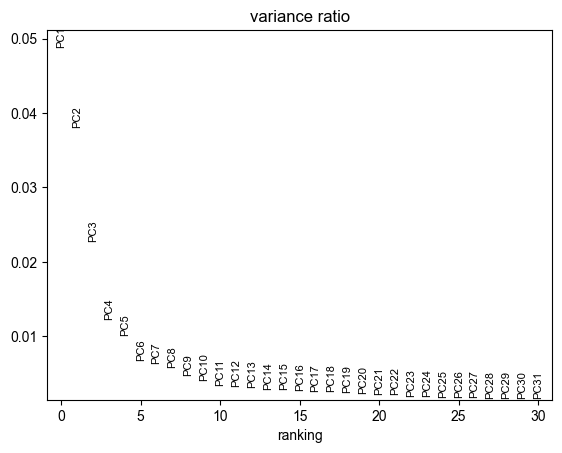

In [4]:
sc.pp.filter_cells(subset_adata, min_genes=200)
sc.pp.filter_genes(subset_adata, min_cells=10)
sc.pp.highly_variable_genes(subset_adata, subset=True, n_top_genes=2000, flavor="seurat_v3_paper", batch_key="characteristics:  Datasets")
sc.pp.normalize_total(subset_adata, exclude_highly_expressed =True)
sc.pp.log1p(subset_adata)
sc.pp.scale(subset_adata, max_value=10)
sc.tl.pca(subset_adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(subset_adata)

In [5]:
sc.pp.neighbors(subset_adata, n_pcs=20)
sc.tl.umap(subset_adata)

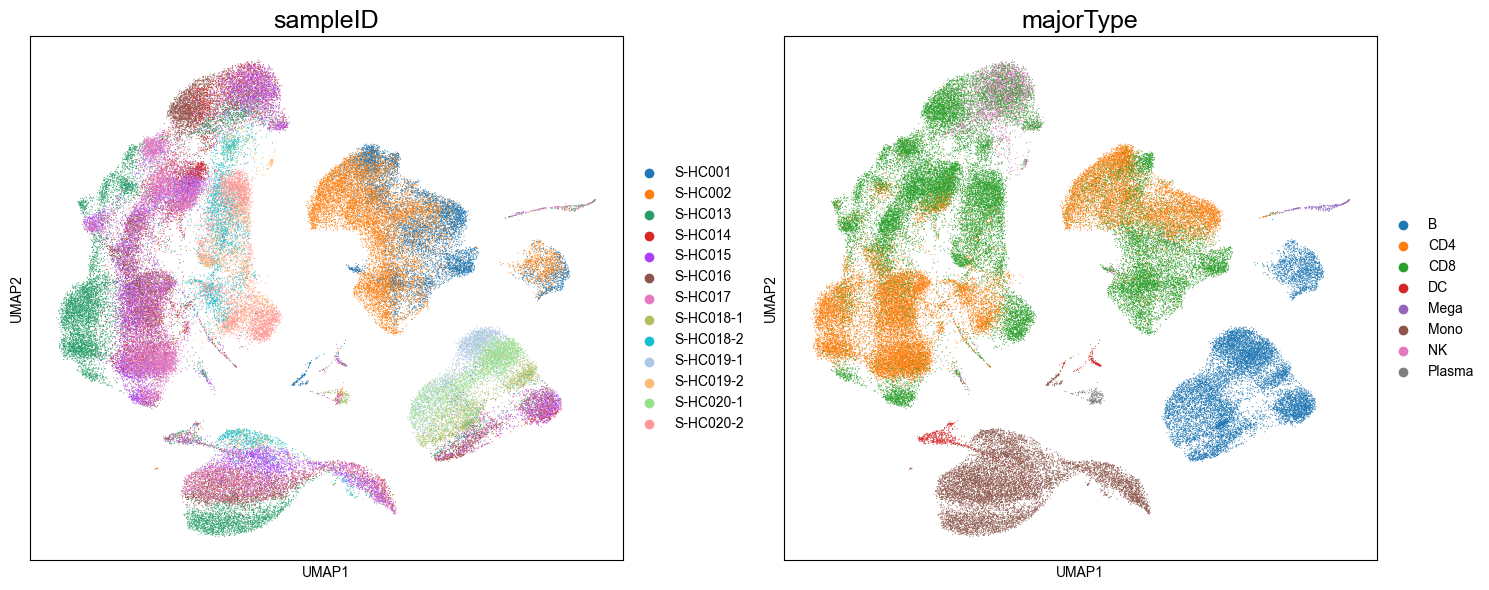

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
sc.pl.umap(subset_adata, color="sampleID", size=2, ax=axs[0], show=False)
sc.pl.umap(subset_adata, color="majorType", size=2, ax=axs[1], show=False)
# sc.pl.umap(subset_adata, color="characteristics:  Datasets", size=2,)
plt.savefig("../figures/umap.png", dpi=300, bbox_inches="tight")

In [7]:
subset_adata

AnnData object with n_obs × n_vars = 84871 × 2000
    obs: 'sampleID', 'celltype', 'majorType', 'title', 'organism', 'Patients', 'characteristics:  Datasets', 'characteristics: City', 'characteristics: Age', 'characteristics: Sex', 'characteristics: Sample type', 'characteristics: CoVID-19 severity', 'characteristics: Sample time', 'characteristics: Sampling day (Days after symptom onset)', 'characteristics: SARS-CoV-2', 'characteristics: Single cell sequencing platform', 'characteristics: BCR single cell sequencing', 'characteristics: TCR single cell sequencing', 'characteristics: Outcome', 'characteristics: Comorbidities', 'characteristics: COVID-19-related medication and anti-microbials', 'characteristics: Leukocytes [G/L]', 'characteristics: Neutrophils [G/L]', 'characteristics: Lymphocytes [G/L]', 'characteristics: Unpublished', 'characteristics: geo accession', 'characteristics: instrument model', 'n_genes'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', '